Data downloaded and read into a dataframe!
   Recession  Automobile_Sales
0          0       2816.753590
1          1        648.516814


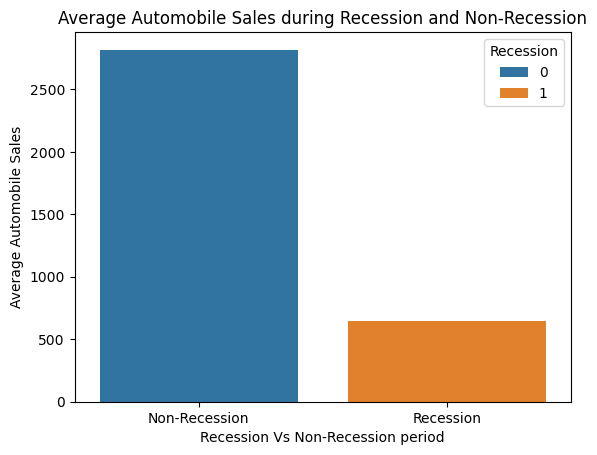

In [5]:
%pip install seaborn

import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
print(new_df)
    # Create the bar chart using seaborn
#plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession Vs Non-Recession period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

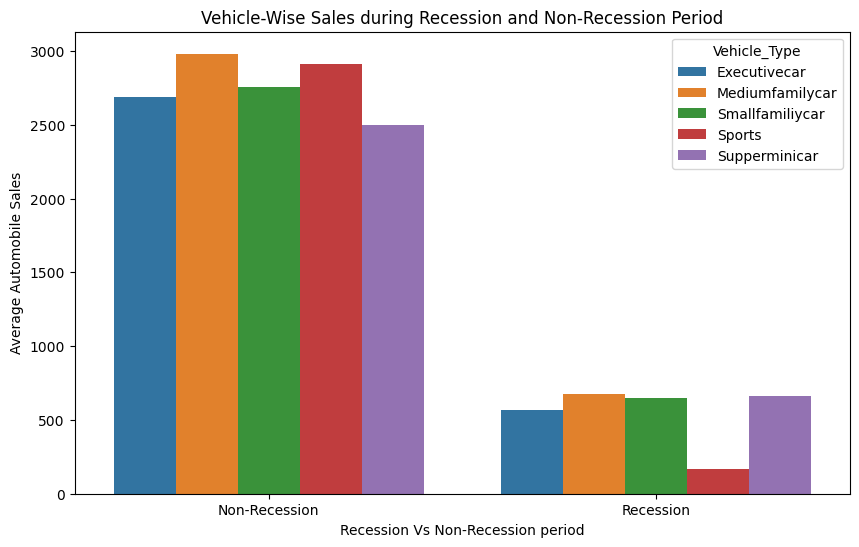

In [6]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Vs Non-Recession period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

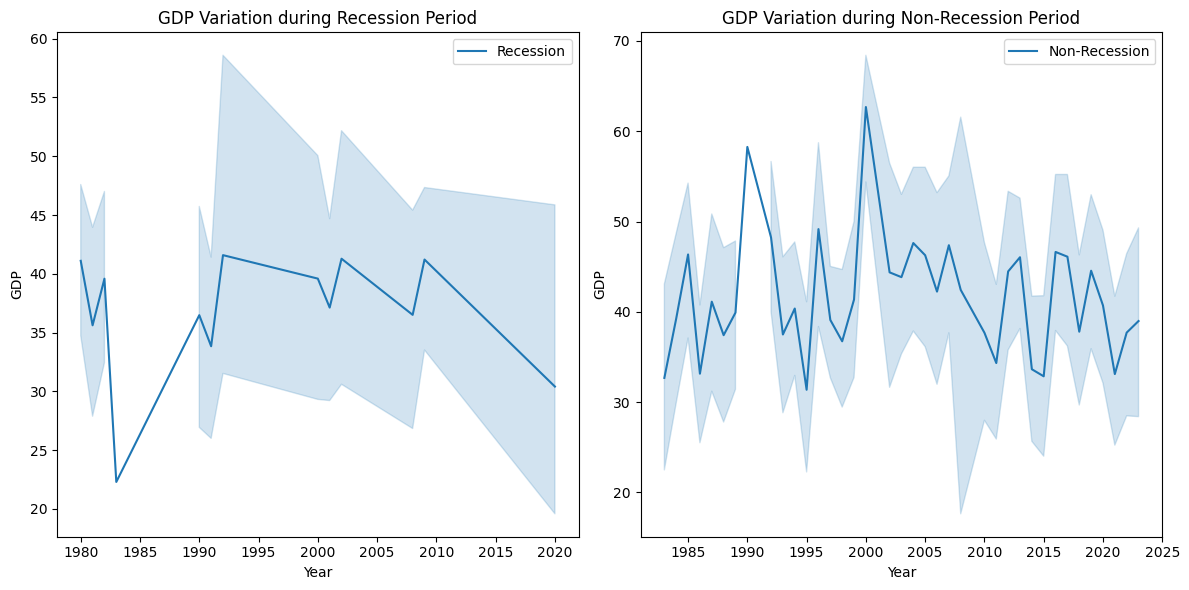

In [7]:
 #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
    #Figure
fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
    #plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
    
plt.tight_layout()
plt.show()

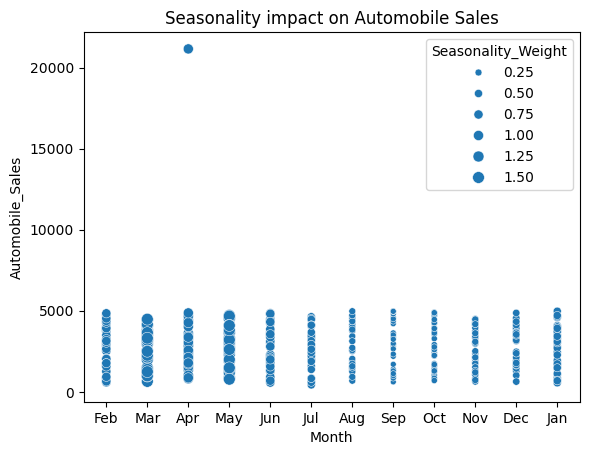

In [8]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

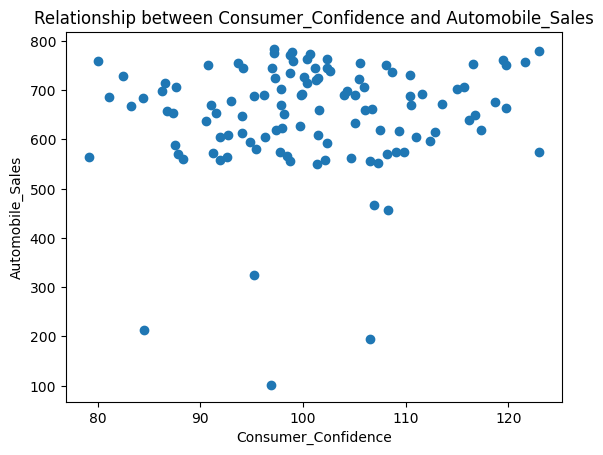

In [9]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Consumer_Confidence and Automobile_Sales')
plt.show()

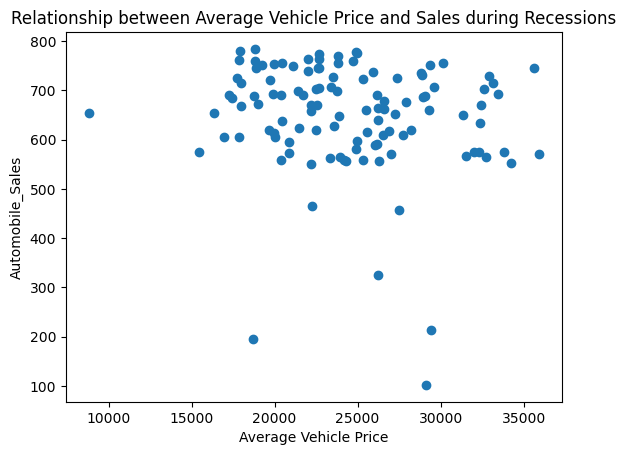

In [10]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

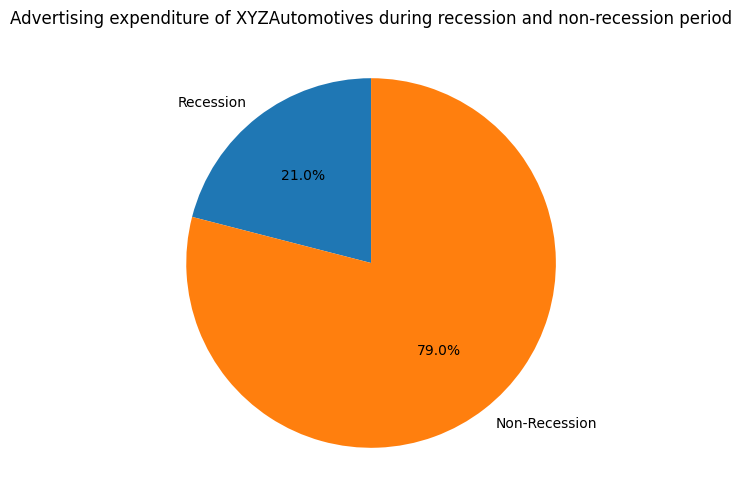

In [13]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising expenditure of XYZAutomotives during recession and non-recession period')

plt.show()

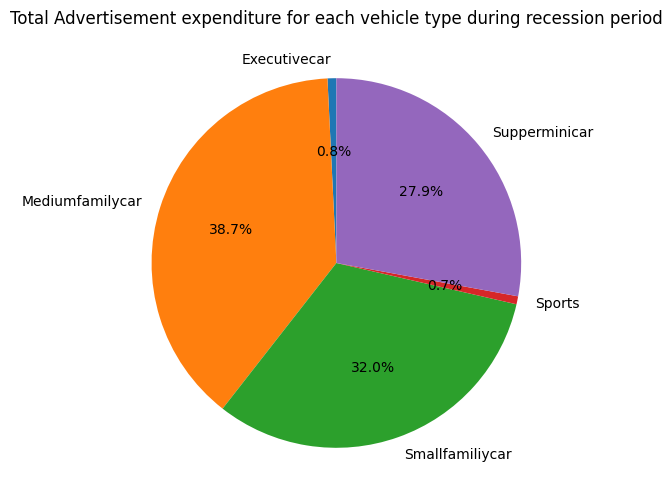

In [14]:
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement expenditure for each vehicle type during recession period')

plt.show()

<ipython-input-15-59a453784ef1>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


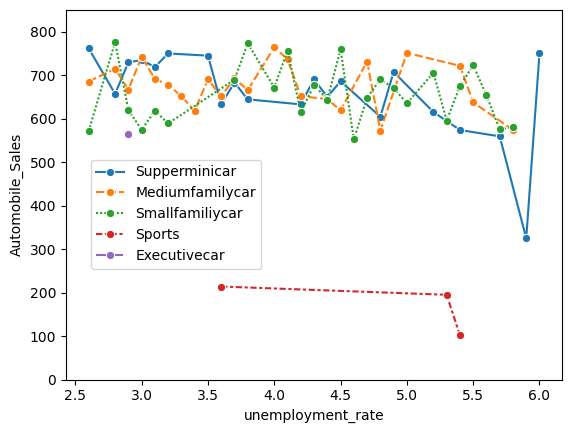

In [15]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

In [16]:
 recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
map1

<class 'IndentationError'>: unexpected indent (<ipython-input-16-f9661bf9cef1>, line 23)